<a href="https://colab.research.google.com/github/benmsanderson/esmperspective/blob/main/interpolate_compatible_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

In [2]:
from datetime import date
from matplotlib.dates import DateFormatter

date_form = DateFormatter("%Y")

In [4]:


# read the dataset
df = pd.read_csv("wpd_datasets.csv")


nmd=len(df.columns)/2
ems=pd.DataFrame()
for i in np.arange(0,nmd):
  df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
  mdl=df.columns[int(2*i)]
  df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
  df0.index.name='timestamp'

  #as_list[0] = date(1930,1,1)
  #

  df0.columns=['emissions']
  df0.index = pd.to_datetime(df0.index)
  df1=pd.to_numeric(df0['emissions'])
  df1 = df1[~df1.index.duplicated()]
  df1.sort_index(inplace=True)

  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
  res = df_reindexed.interpolate(method='pchip', limit_area=None)
  kw = dict(method="quadratic", fill_value="extrapolate")
  ressm=res.rolling(15, win_type='gaussian', center=True).mean(std=10).interpolate(**kw)
  ems[mdl]=ressm

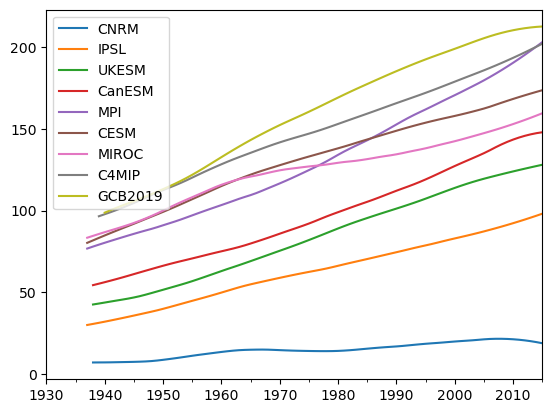

In [5]:
ems.plot()

In [6]:
ems.to_excel("/content/drive/MyDrive/luems0.xlsx",
             sheet_name='emissions')

In [8]:


# read the dataset
df = pd.read_csv("fos_datasets.csv")


nmd=len(df.columns)/2
fos=pd.DataFrame()
for i in np.arange(0,nmd):
  df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
  mdl=df.columns[int(2*i)]
  df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
  df0.index.name='timestamp'
  df0=df0.sort_index()
  as_list = df0.index.tolist()
  #as_list[0] = date(1930,1,1)
  #as_list[-1] = date(2015,1,1)
  df0.index = as_list
  df0.columns=['emissions']
  df0.index = pd.to_datetime(df0.index)
  df1=pd.to_numeric(df0['emissions'])
  df1 = df1[~df1.index.duplicated()]
  df_reindexed = df1.reindex(pd.date_range(start=date(1930,1,1),end=date(2015,1,1),freq='AS'))
  res = df_reindexed.interpolate(method='pchip', limit_area=None)
  kw = dict(method="quadratic", fill_value="extrapolate")
  ressm=res.rolling(15, win_type='gaussian', center=True).mean(std=10).interpolate(**kw)
  fos[mdl]=ressm

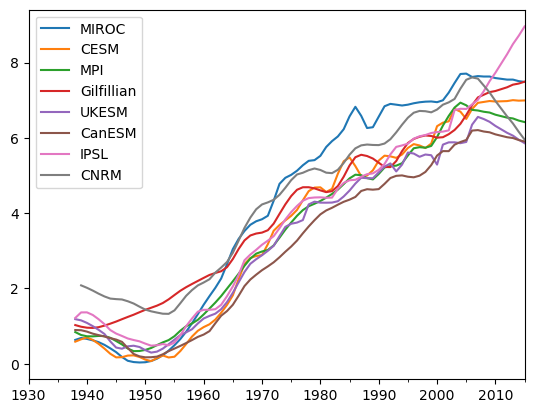

In [9]:
fos.diff().plot()

In [10]:
mdls=['MIROC','CESM','MPI','UKESM','CanESM','IPSL','CNRM']

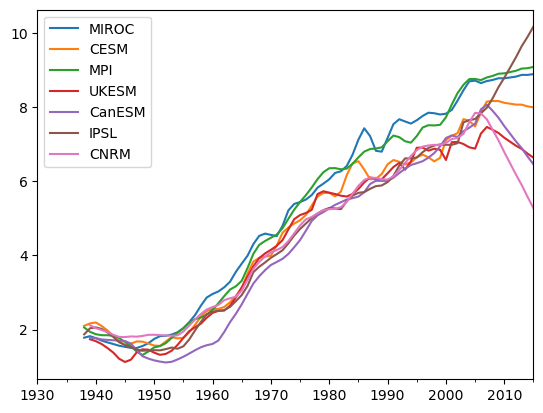

In [11]:
(ems[mdls]+fos[mdls]).diff().plot()

In [12]:
fos.to_excel("fos_ems0.xlsx",
             sheet_name='emissions')

future

In [13]:
mdlf=['ACCESS','CNRM','IPSL','MPI','UKESM','CESM','CanESM','MIROC','NorESM']

In [97]:
fdic={}
for md in mdlf:
  # read the dataset
  df = pd.read_csv("liddicoat/"+md+".csv")


  nmd=len(df.columns)/2
  tmp=pd.DataFrame()
  for i in np.arange(0,nmd):
    df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
    mdl=df.columns[int(2*i)]
    mdl=mdl.lower()
    df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
    df0.index.name='timestamp'
    df0.columns=['emissions']

    if mdl=='hist':
      as_list = df0.index.tolist()
      as_list[0] = date(1986,1,1)
      as_list[-1] = date(2015,1,1)
      dfhist=df0
    else:
      df0=pd.concat([dfhist.dropna(),df0.dropna()])
      as_list = df0.index.tolist()
      as_list[0] = date(1986,1,1)
      as_list[-1] = date(2100,1,1)
    tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
    df0.index = as_list
    df0.index = pd.to_datetime(df0.index)
    df1=pd.to_numeric(df0['emissions'])
    df1 = df1[~df1.index.duplicated()]
    df_reindexed = df1.reindex(tomp)
    res = df_reindexed.interpolate(method='pchip', limit_area=None)
    kw = dict(method="quadratic", fill_value="extrapolate")
    ressm=res.rolling(30, win_type='gaussian', center=True).mean(std=20).interpolate(**kw)

    if mdl!='hist':
     tmp[mdl]=ressm
  fdic[md]=tmp

In [98]:
sspdb=pd.concat(fdic, axis=1)

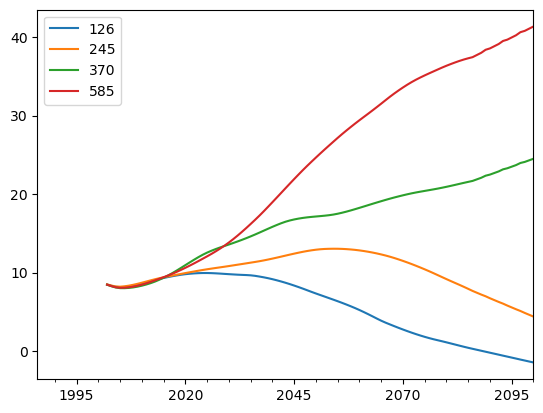

In [99]:
sspdb[md].diff().plot()

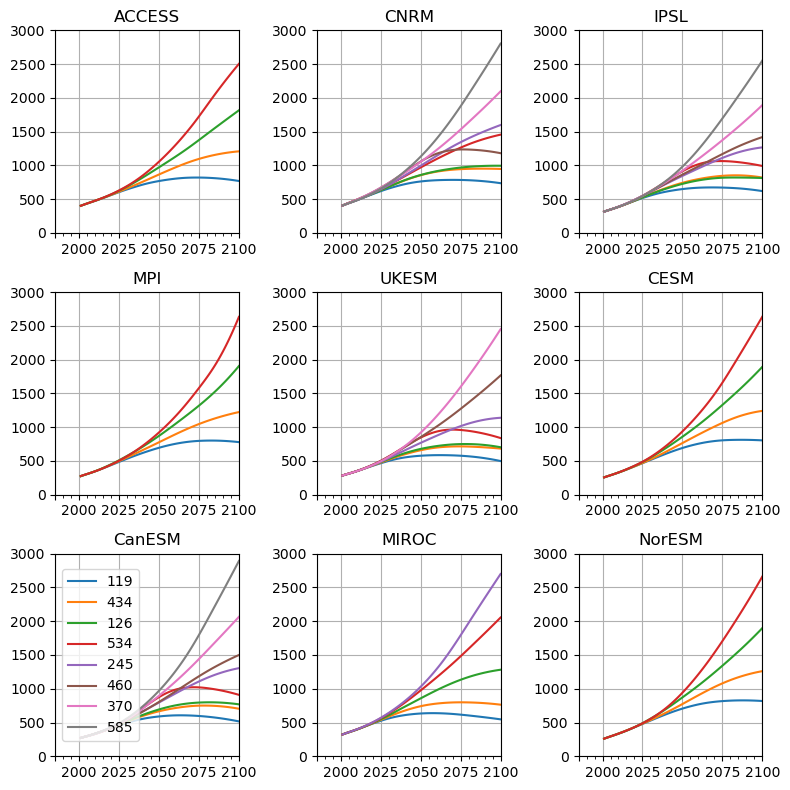

In [100]:
fig, axs = plt.subplots(3,3,figsize=[8,8])
axs=axs.flatten()

for i,md in enumerate(mdlf):

  sspdb[md].plot(ax=axs[i],legend=False)
  axs[i].set_ylim([0,3000])
  axs[i].set_xlim([date(1985,1,1),date(2100,1,1)])
  axs[i].set_xticks([date(1985,1,1),date(2000,1,1),date(2025,1,1),date(2050,1,1),date(2075,1,1),date(2100,1,1)])
  axs[i].set_xticklabels(['','2000','2025','2050','2075','2100'])

  axs[i].set_title(md)
  axs[i].grid()
  if md=='CanESM':
    axs[i].legend(loc='center left')
plt.tight_layout()

In [101]:
mdle=['ACCESS']

In [102]:
from datetime import datetime, timedelta


In [105]:
edic={}
for md in mdlf:
  # read the dataset
  df = pd.read_csv("liddicoat/"+md+"_EM.csv")


  nmd=len(df.columns)/2
  tmp=pd.DataFrame()
  for i in np.arange(0,nmd):
    df0=df.iloc[1:,int(2*i+1):int(2*i+2)].copy()
    mdl=df.columns[int(2*i)]
    mdl=mdl.lower()
    df0.set_index(df.iloc[1:,int(2*i)],inplace=True)
    df0.index.name='timestamp'
    df0.columns=['emissions']
    #df0.index = as_list
    df0=df0.iloc[[np.isnan(x)==0 for x in df0.index.astype('float64')]]
    df0.index = pd.to_datetime(df0.index.astype('float64').astype('int64'),format='%Y')

    if mdl=='hist':
      as_list = df0.index.tolist()
      #as_list[0] = date(1986,1,1)
      #as_list[-1] = date(2015,1,1)
      dfhist=df0
    else:
      df0=pd.concat([dfhist.dropna(),df0.dropna()])
      as_list = df0.index.tolist()
      #as_list[0] = date(1986,1,1)
      #as_list[-1] = date(2100,1,1)
    tomp=pd.date_range(start=date(1986,1,1),end=date(2100,1,1),freq='AS')
    df1=pd.to_numeric(df0['emissions'])
    df1 = df1[~df1.index.duplicated()]
    df_reindexed = df1.reindex(tomp)
    res = df_reindexed.interpolate(method='pchip', limit_area=None)
    kw = dict(method="quadratic", fill_value="extrapolate")
    ressm=res#.rolling(10, win_type='gaussian', center=True).mean(std=5).interpolate(**kw)

    if mdl!='hist':
     tmp[mdl]=ressm
  edic[md]=tmp

In [106]:
emisdb=pd.concat(edic, axis=1)

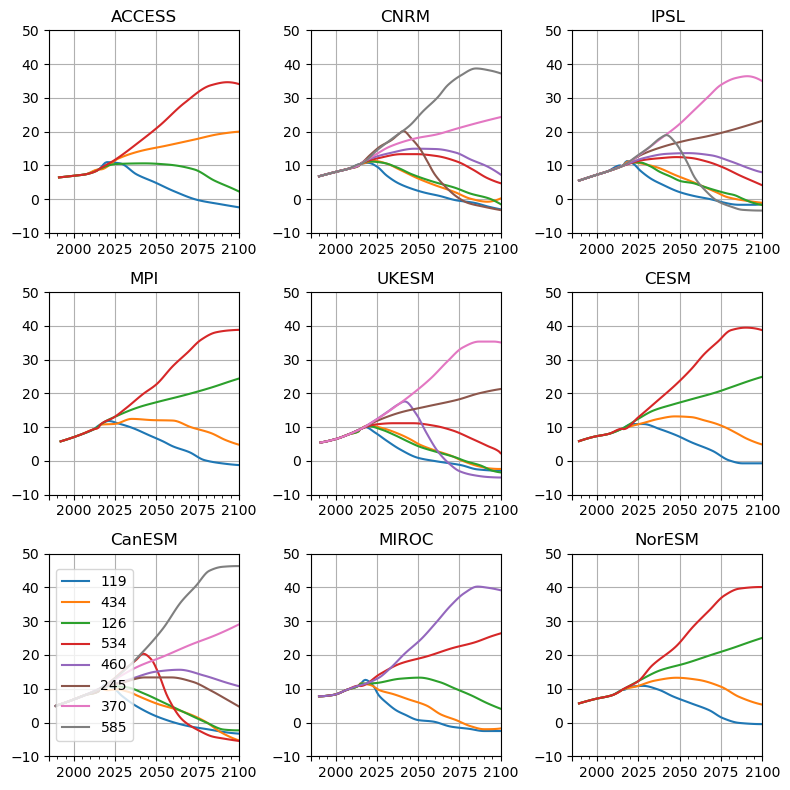

In [107]:
fig, axs = plt.subplots(3,3,figsize=[8,8])
axs=axs.flatten()

for i,md in enumerate(mdlf):

  emisdb[md].plot(ax=axs[i],legend=False)
  axs[i].set_ylim([-10,50])
  axs[i].set_xlim([date(1985,1,1),date(2100,1,1)])
  axs[i].set_xticks([date(1985,1,1),date(2000,1,1),date(2025,1,1),date(2050,1,1),date(2075,1,1),date(2100,1,1)])
  axs[i].set_xticklabels(['','2000','2025','2050','2075','2100'])

  axs[i].set_title(md)
  axs[i].grid()
  if md=='CanESM':
    axs[i].legend(loc='center left')
plt.tight_layout()


In [108]:
mdlf

['ACCESS', 'CNRM', 'IPSL', 'MPI', 'UKESM', 'CESM', 'CanESM', 'MIROC', 'NorESM']

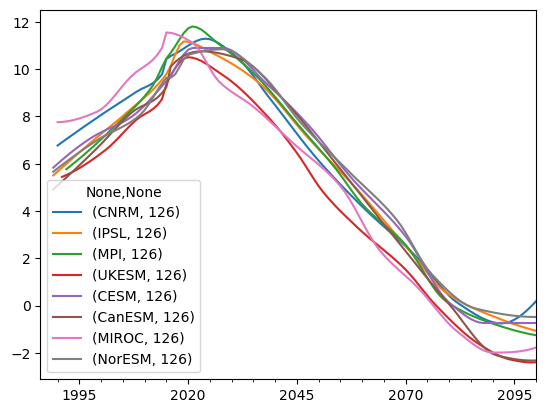

In [109]:
axs=plt.gca()
emisdb[mdlf].loc[:, pd.IndexSlice[:, ['126']]].plot(ax=axs)



In [110]:
scns=['119','126','245','370','534','585']
fullnm={'MIROC':'MIROC-ES2L','CESM':'CESM2','MPI':'MPI-ESM1-2-LR','UKESM':'UKESM1-0-LL','CanESM':'CanESM5','IPSL':'IPSL-CM6A-LR','CNRM':'CNRM-ESM2-1','NorESM':'NorESM2'}

In [111]:
fos

,MIROC,CESM,MPI,Gilfillian,UKESM,CanESM,IPSL,CNRM
1930-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2011-01-01,338.834148,286.417775,298.402569,335.993753,308.803115,298.372029,338.592665,432.515594
2012-01-01,346.380773,293.393867,304.939107,343.336518,314.936771,304.388762,346.813245,439.085523
2013-01-01,353.927580,300.394769,311.454317,350.749029,320.995428,310.384014,355.302771,445.467649
2014-01-01,361.433328,307.382223,317.912599,358.190779,326.945978,316.325024,364.014854,451.627097


In [112]:
sdict={}
for s in scns:
  for i in np.arange(0,10):

    if i==0:
      tmp=(pd.concat([fos[mdls].diff()[date(1940,1,1):date(1990+i,1,1)],emisdb[mdls].xs(s, axis=1, level=1)[date(1991+i,1,1):]]))
    else:
      tmp=tmp+(pd.concat([fos[mdls].diff()[date(1940,1,1):date(1990+i,1,1)],emisdb[mdls].xs(s, axis=1, level=1)[date(1991+i,1,1):]]))
  tmp=tmp/10
  tmp=tmp.rename(columns=fullnm)
  if s=='534':
    nm='ssp534-over'
  else:
    nm='ssp'+s
  sdict[nm]=tmp
scendb=pd.concat(sdict, axis=1)

In [113]:
gcb=pd.read_excel("Global_Carbon_Budget_2022v1.0.xlsx", sheet_name="Historical Budget",skiprows=15,index_col=0)
gcb.index = pd.to_datetime(gcb.index, format='%Y').year


In [114]:
gcb

,fossil emissions excluding carbonation,land-use change emissions,atmospheric growth,ocean sink,land sink,cement carbonation sink,budget imbalance
Year,,,,,,,
1750,0.002552,NaN,NaN,NaN,0.232276,NaN,NaN
1751,0.002552,NaN,-0.074340,NaN,-0.505378,NaN,NaN
1752,0.002553,NaN,-0.070729,NaN,-0.222229,NaN,NaN
1753,0.002553,NaN,-0.067756,NaN,-0.380279,NaN,NaN
1754,0.002554,NaN,-0.064145,NaN,-0.022557,NaN,NaN
...,...,...,...,...,...,...,...
2017,9.851730,1.182300,4.545360,2.854828,3.555004,0.202927,-0.124088
2018,10.050902,1.141200,5.033880,2.947231,3.647435,0.209702,-0.646145
2019,10.120786,1.243800,5.437440,2.994756,3.041949,0.214002,-0.323561


In [115]:
scendb.index.year

Int64Index([1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
            ...
            2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64', length=161)

In [116]:
scendb['ssp119'].columns
cols=['r','y','g','b','c','violet','orange']
cmap = dict(zip(scendb['ssp119'].columns, cols))

In [117]:
scendb['ssp126'].iloc[-1].dropna().index.to_list()

['MIROC-ES2L',
 'CESM2',
 'MPI-ESM1-2-LR',
 'UKESM1-0-LL',
 'CanESM5',
 'IPSL-CM6A-LR',
 'CNRM-ESM2-1']

In [118]:
scendb.T.to_csv("scen_ems.csv")

ssp_em=pd.read_excel('sspfos.xlsx',index_col=0)


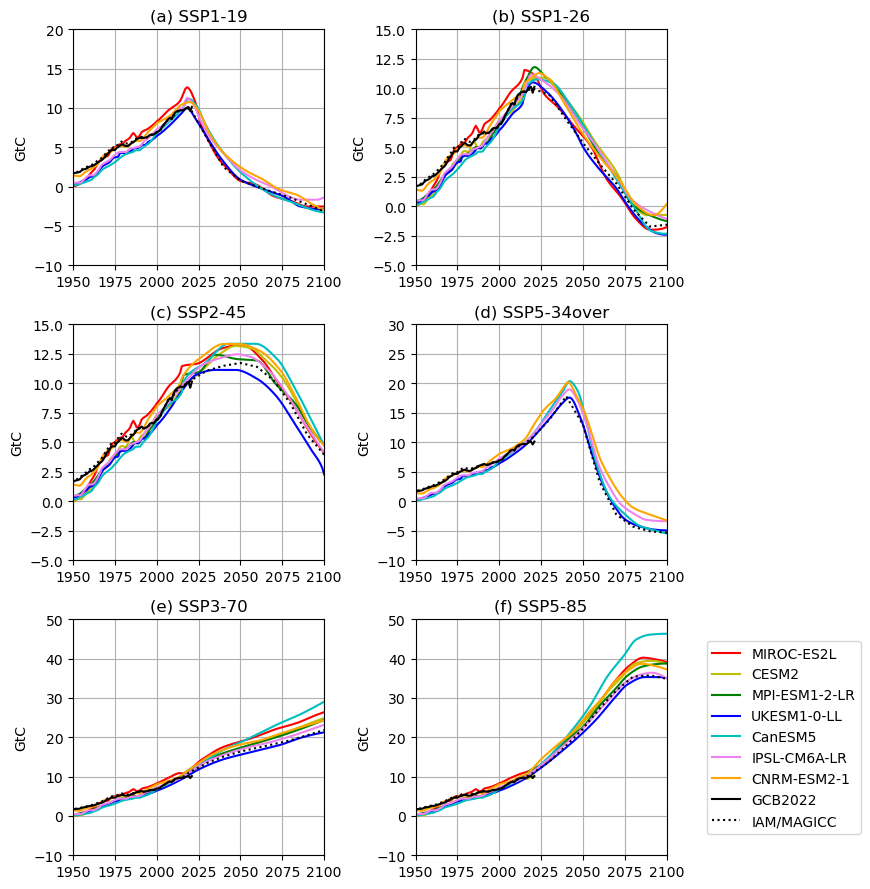

In [119]:

fig, axs = plt.subplots(3,2,figsize=[7,9])
#fig.suptitle('Compatible Fossil Fuel emissions in CMIP6')
axs=axs.flatten()
#ems[mdls].plot(ax=axs[0])
scn='ssp119'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[0].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[0].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
axs[0].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

#axs[0].legend()
axs[0].set_xlim([1950,2100])
axs[0].grid()
axs[0].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[0].set_ylim([-10,50])
axs[0].set_ylim([-10,20])

axs[0].set_title('(a) SSP1-19')
axs[0].set_ylabel('GtC')

scn='ssp126'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[1].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[1].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[0].legend()
axs[1].set_xlim([1950,2100])
axs[1].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[1].grid()
axs[1].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[1].set_ylim([-5,15])

axs[1].set_title('(b) SSP1-26')
axs[1].set_ylabel('GtC')

scn='ssp245'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[2].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[2].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[1].legend()
axs[2].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[2].set_xlim([1950,2100])
axs[2].grid()
axs[2].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[2].set_ylim([-5,15])

axs[2].set_title('(c) SSP2-45')
axs[2].set_ylabel('GtC')

scn='ssp534-over'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[3].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[3].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[2].legend()
axs[3].set_xlim([1950,2100])
axs[3].set_ylim([-10,30])
axs[3].plot(ssp_em.index,ssp_em['ssp534'],'k:',label='IAM/MAGICC')

axs[3].grid()
axs[3].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])

axs[3].set_title('(d) SSP5-34over')
axs[3].set_ylabel('GtC')

scn='ssp370'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[4].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[4].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')
#axs[4].legend()
axs[4].set_xlim([1950,2100])
axs[4].grid()
axs[4].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[4].set_ylim([-10,50])
axs[4].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')

axs[4].set_title('(e) SSP3-70')
axs[4].set_ylabel('GtC')

scn='ssp585'
use=scendb[scn].iloc[-1].dropna().index.to_list()
for i,md in enumerate(use):
  axs[5].plot(scendb.index.year,scendb[scn][md],label=md,color=cmap[md])
axs[5].plot(gcb.index,gcb['fossil emissions excluding carbonation'],'k',label='GCB2022')

axs[5].plot(ssp_em.index,ssp_em[scn],'k:',label='IAM/MAGICC')
axs[5].set_xlim([1950,2100])
axs[5].grid()
axs[5].set_xticks([i for i in [1950,1975,2000,2025,2050,2075,2100]])
axs[5].set_ylim([-10,50])

axs[5].set_title('(f) SSP5-85')
axs[5].set_ylabel('GtC')
plt.tight_layout()
axs[5].legend(loc='right',bbox_to_anchor=(1.8, .5))


In [94]:
scendb['ssp119'].iloc[74].max()

10.902527075812293